This notebook is designed for running in [Colab](https://colab.sandbox.google.com/). Some features will not function if you run it in other environments.

##Preparation:

In `planning-evaluation-framework`, run

`python3 src/data_generators/synthetic_data_design_generator.py  \
--output_dir=eval_analysis_example/data \
--data_design=src/data_generators/analysis_example_data_design.py`

Then

`python3 src/driver/experiment_driver.py  \
--data_design_dir=eval_analysis_example/data \
--experimental_design=src/driver/analysis_example_experimental_design.py \
--output_file=eval_analysis_example/result \
--intermediates_dir=eval_analysis_example/intermediates \
--seed=1
`

We'll obtain a `result` file in the `eval_analysis_example` folder.

In Colab, click the Files tab on the left sidebar, upload `result`, and we're good to run the following codes.

Google internal only: See a sample result file here: https://drive.google.com/corp/drive/folders/1qQJpmZU39N2pp9aK3tV1NsAfZ9GFlB38?resourcekey=0-8S_QmKHUSjNXi9R_FfQF-Q


In [ ]:
#@title Import and read file  {form-width:"30%"}
#@markdown Double click the text area to hide / show codes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from math import ceil

file_name = 'result' #@param {type: 'string'}
df = pd.read_csv('result')

In [ ]:
# Number of rows and columsn in the data frame
df.shape

(3072, 41)

#1. Look at model success rate and what model exceptions we got

In [ ]:
df['model_succeeded'].mean()

0.5930989583333334

In [ ]:
df['model_exception'].value_counts() / len(df)

array must not contain infs or NaNs    0.315104
float division by zero                 0.091797
Name: model_exception, dtype: float64

#2. Aggregation of performance metrics

In [ ]:
#@title {form-width:"20%"}
#@markdown ## Variables to group by

#@markdown #### Model parameters
class ModelVariables:
  single_pub_model = True #@param{type:"boolean"}
  multi_pub_model = True #@param{type:"boolean"}
  strategy = False #@param{type:"boolean"}

#@markdown #### Data parameters
class DataVariables:
  ncampaigns = False #@param{type:"boolean"}
  largest_pub_reach = True #@param{type:"boolean"}
  #@markdown <sup> (Note: There are two other data variables `dataset` and `maximum_reach` in the dataframe. They are omitted here since they are not appropriate variabels for group by.  </sup>

#@markdown #### System parameters
class SystemVariables:
  liquid_legions_sketch_size = False #@param{type:"boolean"}
  liquid_legions_decay_rate = False #@param{type:"boolean"}

#@markdown #### Experiment parameters
class ExperimentalVariables:
  max_frequency = False #@param{type:"boolean"}
  privacy_budget_epsilon = True #@param{type:"boolean"}
  privacy_budget_delta = True #@param{type:"boolean"}
  privacy_mechanisms = False #@param{type:"boolean"}
  #@markdown <sup> (Note: There are three other experimental variables in the dataframe. They are omitted here since they are not appropriate variabels for group by.  </sup>

#@markdown ## Aggregation criterion
criterion = 'mean' #@param ['mean', 'median', 'max']


#@markdown ## Performance metrics to aggregate
class PerformanceMetrics:
  model_succeeded = True #@param{type:"boolean"}
  mean_error = False #@param{type:"boolean"}
  mean_abs_error = False #@param{type:"boolean"}
  mean_squared_error = False #@param{type:"boolean"}
  mean_abs_relative_error = True #@param{type:"boolean"}
  mean_squared_relative_error = True #@param{type:"boolean"}
  var_error = False #@param{type:"boolean"}
  var_relative_error = False #@param{type:"boolean"}
  relative_error_q10 = False #@param{type:"boolean"}
  relative_error_q20 = False #@param{type:"boolean"}
  relative_error_q30 = False #@param{type:"boolean"}
  relative_error_q40 = False #@param{type:"boolean"}
  relative_error_q50 = False #@param{type:"boolean"}
  relative_error_q60 = False #@param{type:"boolean"}
  relative_error_q70 = False #@param{type:"boolean"}
  relative_error_q80 = False #@param{type:"boolean"}
  relative_error_q90 = False #@param{type:"boolean"}
  mean_shuffle_distance = False #@param{type:"boolean"}
  mean_squared_shuffle_distance = False #@param{type:"boolean"}
  var_shuffle_distance = False #@param{type:"boolean"}

def get_selected_attr_names(vars):
  candidate = [name for name in dir(vars) if not name.startswith('__')]
  return [name for name in candidate if getattr(vars, name)]

group_by_vars = (get_selected_attr_names(ModelVariables) + 
                 get_selected_attr_names(DataVariables) +
                 get_selected_attr_names(SystemVariables) + 
                 get_selected_attr_names(ExperimentalVariables))
metrics = get_selected_attr_names(PerformanceMetrics)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
df.groupby(group_by_vars)[metrics].agg(criterion)

mean_abs_relative_error  \
multi_pub_model           single_pub_model largest_pub_reach privacy_budget_delta privacy_budget_epsilon                            
restricted_pairwise_union gamma_poisson    1000              1.000000e-09         0.1                                    1.598717   
                                                                                  1.0                                    1.139839   
                                           1100              1.000000e-09         0.1                                    1.516984   
                                                                                  1.0                                    1.222106   
                          goerg            1000              1.000000e-09         0.1                                   16.153526   
                                                                                  1.0                                    3.364061   
                                           1100              1.000000e-09         0.1                                   41.804572   
                                                                                  1.0                                    3.559362   

                                                                                                          mean_squared_relative_error  \
multi_pub_model           single_pub_model largest_pub_reach privacy_budget_delta privacy_budget_epsilon                                
restricted_pairwise_union gamma_poisson    1000              1.000000e-09         0.1                                    4.121578e+03   
                                                                                  1.0                                    1.954511e+03   
                                           1100              1.000000e-09         0.1                                    4.071856e+03   
                                                                                  1.0                                    2.394133e+03   
                          goerg            1000              1.000000e-09         0.1                                    7.217666e+07   
                                                                                  1.0                                    5.391753e+05   
                                           1100              1.000000e-09         0.1                                    2.485697e+09   
                                                                                  1.0                                    1.330929e+06   

                                                                                                          model_succeeded  
multi_pub_model           single_pub_model largest_pub_reach privacy_budget_delta privacy_budget_epsilon                   
restricted_pairwise_union gamma_poisson    1000              1.000000e-09         0.1                            0.244792  
                                                                                  1.0                            0.723958  
                                           1100              1.000000e-09         0.1                            0.208333  
                                                                                  1.0                            0.723958  
                          goerg            1000              1.000000e-09         0.1                            0.390625  
                                                                                  1.0                            1.000000  
                                           1100              1.000000e-09         0.1                            0.453125  
                                                                                  1.0                            1.000000

#3. Pick the best modeling strategy


You selected to compare the options in the following model variables: multi_pub_model, single_pub_model.
For multi_pub_model, only one option restricted_pairwise_union is included in this experiment, and there is no alternative option to compare.
For single_pub_model, we compare 2 options: goerg vs gamma_poisson.
The comparison is done in the experimental trials with: ncampaigns = 2.

First compare the success rate:


num_succeeded_trials  success_rate
multi_pub_model           single_pub_model                                    
restricted_pairwise_union gamma_poisson                      446      0.580729
                          goerg                              606      0.789062


Then, among the succeeded trials, compare each selected error metric between different model options.


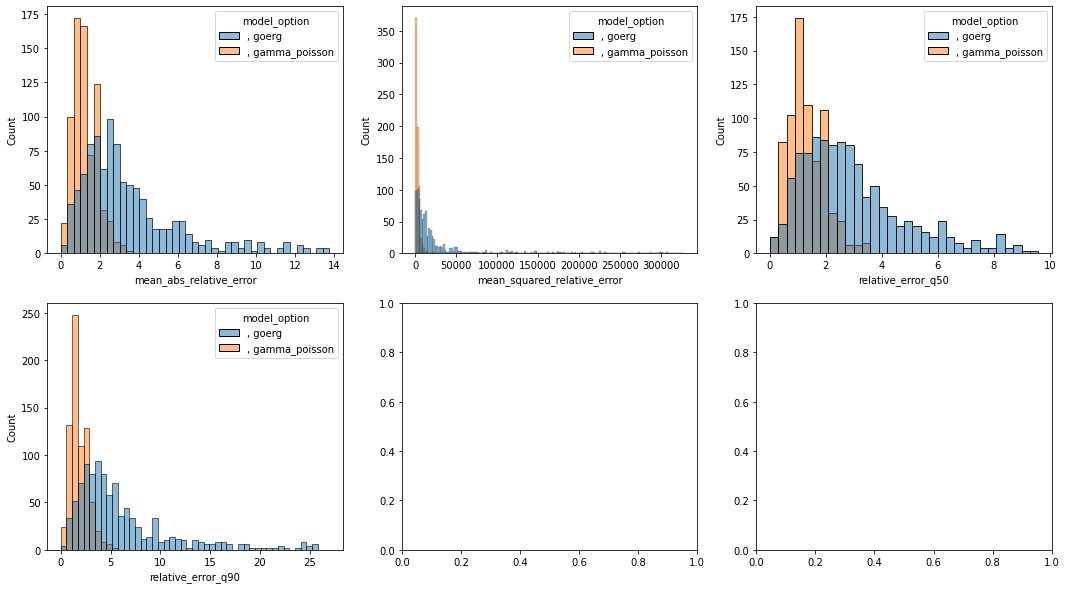

In [ ]:
#@title {form-width: '30%'}
#@markdown ## Model variables to compare: 
class ModelVariablesToCompare:
  single_pub_model = True #@param{type:"boolean"}
  multi_pub_model = True #@param{type:"boolean"}
  strategy = False #@param{type:"boolean"}

#@markdown ## Compare in the scope of:
#@markdown <sup> Note to use the following cell: 
#@markdown when you update a new dataframe, possibly the options, i.e.,
#@markdown levels of some variables are changed.
#@markdown In that case, go [here](https://colab.research.google.com/drive/1x0t13pdnqH8-hiVxWN9n8ikSiFE-3DFu?resourcekey=0-SqI4xjkF8jrb3b4MyU72kA#scrollTo=YhHL7GmPgPHH&line=10&uniqifier=1)
#@markdown to update the dropdown menus.
#@markdown Or you can manually input the option. (We will automatically handle the type of your input.)
#@markdown In case you input or select an invalid option at some field, 
#@markdown an error will be raised to point you to the field.  </sup>
#@markdown #### Data variables
class DataOptions:
  largest_pub_reach = 'all_options' #@param ['all_options', 1000, 1100] {allow-input: true}
  ncampaigns = '2' #@param ['all_options', 2, 3] {allow-input: true}

#@markdown #### System variables
class SystemOptions:
  liquid_legions_decay_rate = 'all_options' #@param ['all_options', 3] {allow-input: true}
  liquid_legions_sketch_size = 'all_options' #@param ['all_options', 2000] {allow-input: true}

#@markdown #### Experimental variables
class ExperimentalOptions:
  max_frequency = 'all_options' #@param ['all_options', 3, 6] {allow-input: true}
  privacy_budget_delta = 'all_options' #@param ['all_options', 1e-09] {allow-input: true}
  privacy_budget_epsilon = 'all_options' #@param ['all_options', 0.1, 1.0] {allow-input: true}
  privacy_mechanisms = 'all_options' #@param ['all_options', 'Discrete Gaussian'] {allow-input: true}

#@markdown ## Performance metrics to plot
class PerformanceMetricsToPlot:
  #@markdown model_succeeded will always be selected
  mean_error = False #@param{type:"boolean"}
  mean_abs_error = False #@param{type:"boolean"}
  mean_squared_error = False #@param{type:"boolean"}
  mean_abs_relative_error = True #@param{type:"boolean"}
  mean_squared_relative_error = True #@param{type:"boolean"}
  var_error = False #@param{type:"boolean"}
  var_relative_error = False #@param{type:"boolean"}
  relative_error_q10 = False #@param{type:"boolean"}
  relative_error_q20 = False #@param{type:"boolean"}
  relative_error_q30 = False #@param{type:"boolean"}
  relative_error_q40 = False #@param{type:"boolean"}
  relative_error_q50 = True #@param{type:"boolean"}
  relative_error_q60 = False #@param{type:"boolean"}
  relative_error_q70 = False #@param{type:"boolean"}
  relative_error_q80 = False #@param{type:"boolean"}
  relative_error_q90 = True #@param{type:"boolean"}
  mean_shuffle_distance = False #@param{type:"boolean"}
  mean_squared_shuffle_distance = False #@param{type:"boolean"}
  var_shuffle_distance = False #@param{type:"boolean"}

#@markdown ## Type of plot
plot_type = 'histogram' #@param ['boxplot', 'histogram']


### Verbose model options to compare

class color:
  PURPLE = '\033[95m'
  CYAN = '\033[96m'
  DARKCYAN = '\033[36m'
  BLUE = '\033[94m'
  GREEN = '\033[92m'
  YELLOW = '\033[93m'
  RED = '\033[91m'
  BOLD = '\033[1m'
  UNDERLINE = '\033[4m'
  END = '\033[0m'

def stylize(text):
  return color.BLUE + color.BOLD + text + color.END


model_vars = get_selected_attr_names(ModelVariablesToCompare)
print('You selected to compare the options in the following model variables: '
      + ', '.join([stylize(var) for var in model_vars]) + '.')

actual_model_vars = []
for var in model_vars:
  options = df[var].unique()
  if len(options) > 1:
    actual_model_vars.append(var)
    print(f'For {stylize(var)}, we compare {len(options)} options: ' + 
          ' vs '.join([stylize(str(opt)) for opt in options]) + '.')
  else:
    print(f'For {stylize(var)}, only one option {stylize(options[0])} is included '
          'in this experiment, and there is no alternative option to compare.')

### Verbose scope for comparison

def select_rows_one_option_class(option_class, var_name):
  opt = getattr(option_class, var_name)
  if opt == 'all_options':
    return None, True
  try:
    opt = type(df[var_name].iloc[0]) (opt)
  except:
    raise TypeError(
        f'The input option of {var_name} cannot be converted to the '
        'correct type. Please check.'
    )
  if not opt in df[var_name].unique():
    raise ValueError(
        f'The input option of {var_name} does not '
        'match any record. Please manually input a valid option '
        'or update the drop-down menus using the link '
        'above this cell.'
    )
  return opt, df[var_name] == opt

def select_rows_multiple_option_classes(class_ls):
  condition = True
  scope_verbose = []
  for option_class in class_ls:
    for name in dir(option_class):
      if not name.startswith('__'):
        opt, new_condition = select_rows_one_option_class(option_class, name)
        if opt:
          condition &= new_condition
          scope_verbose.append(stylize(f'{name} = {opt}'))
  return condition, scope_verbose


rows, verbose = select_rows_multiple_option_classes(
    [DataOptions, SystemOptions, ExperimentalOptions])

if len(verbose):
  print('The comparison is done in the experimental trials with: ' +
        ' & '.join(verbose) + '.')
else:
  print('The comparison is done in all the experimental trials.')

### Print comparison results
print('\nFirst compare the success rate:')
agg = df[rows].groupby(model_vars)['model_succeeded'].agg(['sum', 'mean'])
agg.columns = ['num_succeeded_trials', 'success_rate']
display.display(agg)

print('\nThen, among the succeeded trials, compare each selected '
      'error metric between different model options.')

df_plot = df.copy()
df_plot['model_option'] = ''
for var in actual_model_vars:
  df_plot['model_option'] += ', ' + df_plot[var]

all_metrics = get_selected_attr_names(PerformanceMetricsToPlot)
num_plots = len(all_metrics)
plot_cols = 3
plot_rows = ceil(num_plots / plot_cols)
fig, axes = plt.subplots(plot_rows, plot_cols, figsize=(18, 10))
count = 0
for metric in all_metrics:
  ub = min(df_plot[metric].max(), df_plot[metric].quantile(0.9) * 2)
  if plot_type == 'boxplot':
    sns.boxplot(x='model_option', y=metric, data=df_plot)
    plt.ylim(0, ub)
    # plt.show()
  else:
    sns.histplot(x=metric, hue='model_option', data=df_plot, binrange=(0, ub),
                 ax=axes[count // plot_cols, count % plot_cols])
    # plt.show()
  count += 1

# Draft: some hacks I used to write the script...

In [ ]:
#@title For section 2 {form-width: '20%'}

raw_codes = '''
model_parameters = ['single_pub_model', 'multi_pub_model', ' strategy']

data_parameters = ['dataset', 'ncampaigns', 'largest_pub_reach', 'maximum_reach']

system_parameters = ['liquid_legions_sketch_size', 'liquid_legions_decay_rate']

experiment_parameters = [
  'max_frequency',
  'privacy_budget_epsilon',
  'privacy_budget_delta',
  'privacy_used_epsilon',
  'privacy_used_delta',
  'privacy_mechanisms',
  'npoints']

error_metrics = [
  'mean_error',
  'mean_abs_error',
  'mean_squared_error',
  'mean_abs_relative_error',
  'mean_squared_relative_error',
  'var_error',
  'var_relative_error',
  'relative_error_q10',
  'relative_error_q20',
  'relative_error_q30',
  'relative_error_q40',
  'relative_error_q50',
  'relative_error_q60',
  'relative_error_q70',
  'relative_error_q80',
  'relative_error_q90',
  'mean_shuffle_distance',
  'mean_squared_shuffle_distance',
  'var_shuffle_distance']
'''

strings = raw_codes.split('\n\n')

def mark(string, section_layer):
  section_sign = ''.join(['#'] * section_layer)
  return ' '.join(['#@markdown', section_sign, string])

fixed_piece = ' = True #@param' + '{type:"boolean"}'

new_codes = '#@title' +  ' {form-width:"20%"}' + '\n'
new_codes += mark('Variables to group by', 2)
new_codes += '\n'


for string in strings:
  if len(string) > 0:
    # First remove new line, space, and quote sign
    chars_to_remove = [' ', '\n', '\'', '[', ']']
    for char in chars_to_remove:
      string = string.replace(char, '')
    var, levels = string.split('=')
    var = var.replace('_', ' ').capitalize()
    if var == 'Error metrics':
      new_codes += mark(var, 2)
    else:
      new_codes += mark(var, 4)
    new_codes += '\n'
    new_codes += '\n'.join([level + fixed_piece for level in levels.split(',')])
    new_codes += '\n\n'

In [ ]:
#@title For section 3 {form-width: '20%'}

def var_write_options(col):
  levels = df[col].unique()
  all = '\'all_options\''
  if type(levels[0]) == str:
    str_levels = [all] + [f'\'{l}\'' for l in levels]
  else:
    str_levels = [all] + [str(l) for l in levels]
  print(f'{col} = {all} ' + '#@param' +
        ' [' + ', '.join(str_levels) + '] {allow-input: true}')

def class_write_options(vars):
  for col in [name for name in dir(vars) if not name.startswith('__')]:
    var_write_options(col)

#@markdown Paste the following three segments of outputs respectively to the `DataOptions`,
#@markdown `SystemOptions` and `ExperimentOptions` classes in Section 3.
class_write_options(DataVariables)
print('\n')
class_write_options(SystemVariables)
print('\n')
class_write_options(ExperimentalVariables)
print('\n')

largest_pub_reach = 'all_options' #@param ['all_options', 1000, 1100] {allow-input: true}
ncampaigns = 'all_options' #@param ['all_options', 2, 3] {allow-input: true}


liquid_legions_decay_rate = 'all_options' #@param ['all_options', 3] {allow-input: true}
liquid_legions_sketch_size = 'all_options' #@param ['all_options', 2000] {allow-input: true}


max_frequency = 'all_options' #@param ['all_options', 3, 6] {allow-input: true}
privacy_budget_delta = 'all_options' #@param ['all_options', 1e-09] {allow-input: true}
privacy_budget_epsilon = 'all_options' #@param ['all_options', 0.1, 1.0] {allow-input: true}
privacy_mechanisms = 'all_options' #@param ['all_options', 'Discrete Gaussian'] {allow-input: true}


